# Manuelle Prüfung der Indices
Dieses Modul versucht mittels einer stichprobenartigen Auswahl einiger Werbespots das Spektogramm mit den Kennzahlen gegebüberzustellen. Ziel ist es, für die Analyse geeignete Kennzahlen zu finden.



---

## Import und Installation benötigter Pakete

In [1]:
#import pprint

In [2]:
%pip install librosa
%pip install python_speech_features

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 3.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.4/401.4 kB 8.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 16.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.4/479.4 kB 12.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/1

In [3]:
#!/usr/bin/env python
import os
import cv2
import librosa
import librosa.display
from python_speech_features import mfcc
import wave
import audioop
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/tmp/ipykernel_8349/2759893558.py:8: DeprecationWarning: 'audioop' is deprecated and slated for removal in Python 3.13
  import audioop




---

## Import der Dateien aus GDrive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'



---

## Einladen ausgewählter Werbungen und dessen Kennzahlen

In [ ]:
audio_path = f'/content/drive/MyDrive/SuperBowl_Project_FUB/Data/Ads_technicalComplexity/Audio/'

In [ ]:
selected_ads = {
    'ADs_IG_2013_wav' : {
      "AD0252" : ['ab ca. 22 Sekunden eher komplex'],
      "AD0264" : ['viele Ereignisse, Audio eher komplexer'],
      "AD0265" : ['Musik im Vordergrund, eher komplex'],
      "AD0279" : ['am Anfang entspannter, zwischendurch komplex'],
      "AD0281" : ['eher unkomplex'],
    },
    'ADs_IG_2014_wav' : {
      "AD0301" : ['eher unkomplex, angenehmer Sound'],
      "AD0304" : ['Musik im Vordergrund, eher komplex'],
      "AD0316" : ['Musik im Vordergrund, eher gleichermaßen (un-)komplex'],
      "AD0323" : ['Gesprochenes im Vordergrund, unkomplex'],
    },
    'ADs_IG_2015_wav' : {
      "AD0357" : ['eher unkomplex'],
      "AD0363" : ['Extremwert eines Indices'],
      "AD0369" : ['Kind spricht, leicht komplexer'],
      "AD0375" : ['Musik im Vordergrund, eher gleichverteilt unkomplex'],
      "AD0376" : ['Moderatorstimme im Vordergrund, Hintergrund leicht komplex'],
      "AD0378" : ['viele Ergeignisse, eher komplex'],
      "AD0379" : ['Extremwert eines Indices'],
    },
    'ADs_IG_2016_wav' : {
      "AD0415" : ['komplex'],
      "AD0417" : ['komplexe Musik'],
      "AD0428" : ['komplex, viele alltägliche Sounds'],
      "AD0431" : ['eher energetisch und unkomplex, angenehmer Sound'],
      "AD0434" : ['komplexe Musik'],
      "AD0441" : ['ab ca. 10 Sekunden sehr komplex'],
    },
    'ADs_IG_2017_wav' : {
      "AD0467" : ['Extremwert eines Indices'],
      "AD0472" : ['teils komplex, viel Dynamik'],
      "AD0480" : ['Extremwert eines Indices'],
      "AD0484" : ['komplex, viel Dynamik'],
    },
    'ADs_IG_2018_wav' : {
      "AD0576" : ['Extremwert eines Indices'],
    },
    #'ADs_IG_2019_wav' : {
    #},
    'ADs_IG_2020_wav' : {
      "AD0661" : ['Extremwert eines Indices'],
    },
    #'ADs_IG_2021_wav' : {
    #},
    'ADs_IG_2022_wav' : {
      "AD0746" : ['komplexe Tonspur'],
      "AD0748" : ['Musik im Vordergrund, viele Beats'],
      "AD0749" : ['Extremwert eines Indices'],
      "AD0774" : ['Musik im Vordergrund, leicht komplex, viele Soundeffekte'],
    },
}

In [ ]:
acoustic_indices = pd.read_excel("/content/drive/MyDrive/SuperBowl_Project_FUB/Colab_Notebooks/Acoustic_Indices/outputs.xlsx", sheet_name=0)

In [ ]:
acoustic_indices.describe()

,Acoustic_Complexity_Index__main_value,Acoustic_Complexity_Index__min,Acoustic_Complexity_Index__max,Acoustic_Complexity_Index__mean,Acoustic_Complexity_Index__median,Acoustic_Complexity_Index__std,Acoustic_Complexity_Index__var,Acoustic_Diversity_Index__main_value,Acoustic_Evenness_Index__main_value,Bio_acoustic_Index__main_value,...,Acoustic_Diversity_Index_NR__main_value,Acoustic_Evenness_Index_NR__main_value,Bio_acoustic_Index_NR__main_value,Spectral_Entropy_NR__main_value,duration,tempo,avg_db,min_db,max_db,max_db_value
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,...,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.0,534.0,534.0
mean,1465.322346,162.461298,183.203139,172.168348,171.732758,6.478740,55.429919,2.165002,0.260062,4.372212,...,2.191775,0.232919,4.313795,0.809582,83.556442,119.252162,-65.070075,-80.0,0.0,0.0
std,672.825340,7.700262,12.128181,6.527969,6.456725,3.671661,97.060136,0.135262,0.117171,1.819424,...,0.117842,0.104756,1.832413,0.044474,39.645254,25.199293,3.784919,0.0,0.0,0.0
min,377.337423,129.453550,157.030922,147.424617,146.102961,0.442780,0.196054,1.066756,0.035229,1.215222,...,1.108315,0.034289,1.199707,0.590331,18.854603,57.421875,-76.000030,-80.0,0.0,0.0
25%,1024.566798,157.690833,176.086223,167.741647,167.409229,4.307560,18.555077,2.120383,0.173099,3.163545,...,2.161248,0.160648,3.124221,0.783366,56.796009,103.359375,-67.757816,-80.0,0.0,0.0
50%,1072.047427,162.651045,181.656348,171.759605,171.567657,5.882965,34.609305,2.199065,0.252373,4.109549,...,2.221251,0.223832,4.066866,0.813924,61.904399,117.453835,-65.274733,-80.0,0.0,0.0
75%,2020.574530,167.344172,187.373579,175.896950,175.842075,7.787795,60.649868,2.253903,0.330154,5.202420,...,2.260078,0.292722,5.110629,0.839313,113.266939,135.999178,-62.675586,-80.0,0.0,0.0
max,5676.658006,186.104562,277.539679,199.107027,196.848641,34.409616,1184.021673,2.300058,0.760898,17.523335,...,2.300275,0.753021,17.956916,0.913058,320.435374,198.768029,-52.587351,-80.0,0.0,0.0


In [ ]:
acoustic_indices.head()

,filename,Acoustic_Complexity_Index__main_value,Acoustic_Complexity_Index__min,Acoustic_Complexity_Index__max,Acoustic_Complexity_Index__mean,Acoustic_Complexity_Index__median,Acoustic_Complexity_Index__std,Acoustic_Complexity_Index__var,Acoustic_Diversity_Index__main_value,Acoustic_Evenness_Index__main_value,...,Acoustic_Diversity_Index_NR__main_value,Acoustic_Evenness_Index_NR__main_value,Bio_acoustic_Index_NR__main_value,Spectral_Entropy_NR__main_value,duration,tempo,avg_db,min_db,max_db,max_db_value
0,AD0252.wav,2208.510371,159.334150,174.786691,169.885413,171.421445,4.343994,18.870287,2.209448,0.235181,...,2.220000,0.224009,4.769211,0.788289,133.143220,117.453835,-67.038931,-80,0,0
1,AD0253.wav,981.887881,160.890657,166.021768,163.647980,163.933217,1.996711,3.986854,2.298657,0.049937,...,2.300275,0.034289,3.116005,0.839623,62.693878,107.666016,-57.724476,-80,0,0
2,AD0254.wav,1039.894574,165.138279,180.316658,173.315762,173.641721,4.478075,20.053152,2.201584,0.248334,...,2.258920,0.165571,4.949083,0.805914,61.904399,123.046875,-65.943250,-80,0,0
3,AD0255.wav,1028.859129,166.139025,177.516437,171.476522,171.033001,3.961926,15.696859,2.270366,0.142867,...,2.281270,0.115659,3.348784,0.810870,62.275918,95.703125,-63.275263,-80,0,0
4,AD0256.wav,1006.416258,152.076879,176.085684,167.736043,169.798161,7.520835,56.562962,2.280644,0.117247,...,2.272198,0.135594,4.241551,0.831309,61.579320,78.302557,-61.789163,-80,0,0




---


## Vergleich der eingeladenen Kennzahlen und der Spektogramme<br>für ausgewählte Werbungen

In [ ]:
indices_to_analyse = [
    'Acoustic_Complexity_Index__main_value',
    'Acoustic_Diversity_Index__main_value',
    'Acoustic_Evenness_Index__main_value',
    'RMS_energy__mean',
    'Spectral_centroid__mean',
    'Spectral_Entropy__main_value',
    'Temporal_Entropy__main_value',
    'ZCR__mean',
]

In [ ]:
def get_indice_of_ad(indice, ad_name):
  return acoustic_indices.loc[acoustic_indices['filename'] == ad_name][indice].iloc[0]

#get_indice_of_ad('ZCR__mean', 'AD0252.wav')

Year: ADs_IG_2016_wav
  AD ID: AD0431
  Path: /content/drive/MyDrive/SuperBowl_Project_FUB/Data/Ads_technicalComplexity/Audio/ADs_IG_2016_wav/AD0431.wav

    Description: eher energetisch und unkomplex, angenehmer Sound

    Acoustic_Complexity_Index__main_value: 2100.961687997673

    Acoustic_Diversity_Index__main_value: 2.200869783547485

    Acoustic_Evenness_Index__main_value: 0.2517834573795815

    RMS_energy__mean: 0.03225940729120443

    Spectral_centroid__mean: 3819.67453117535

    Spectral_Entropy__main_value: 0.8368308773983268

    Temporal_Entropy__main_value: 0.9697859907582003

    ZCR__mean: 0.1139409232487071



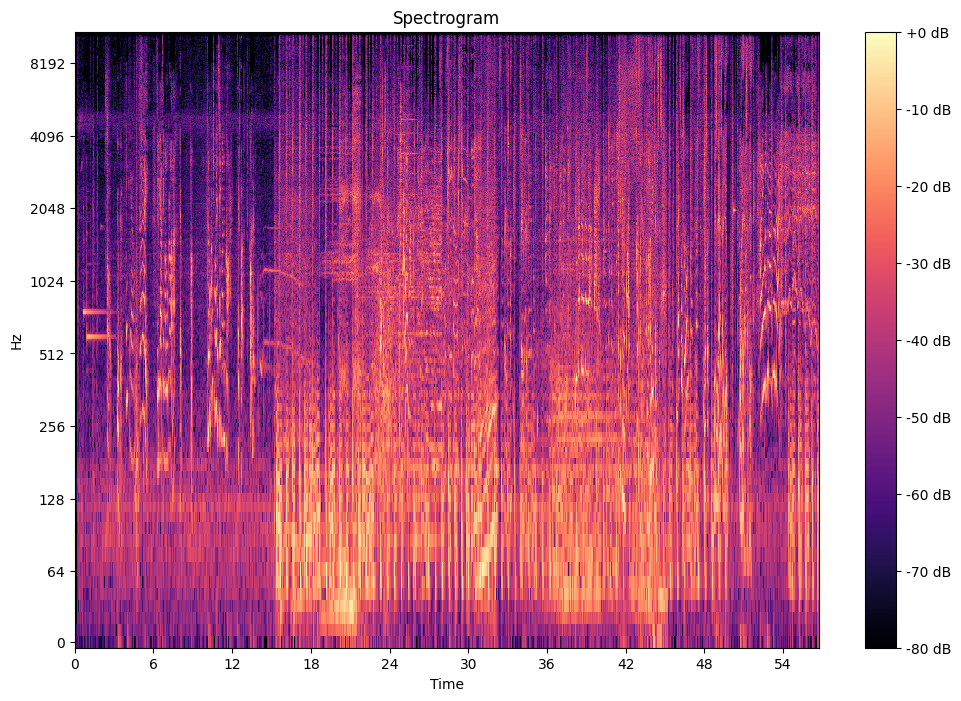

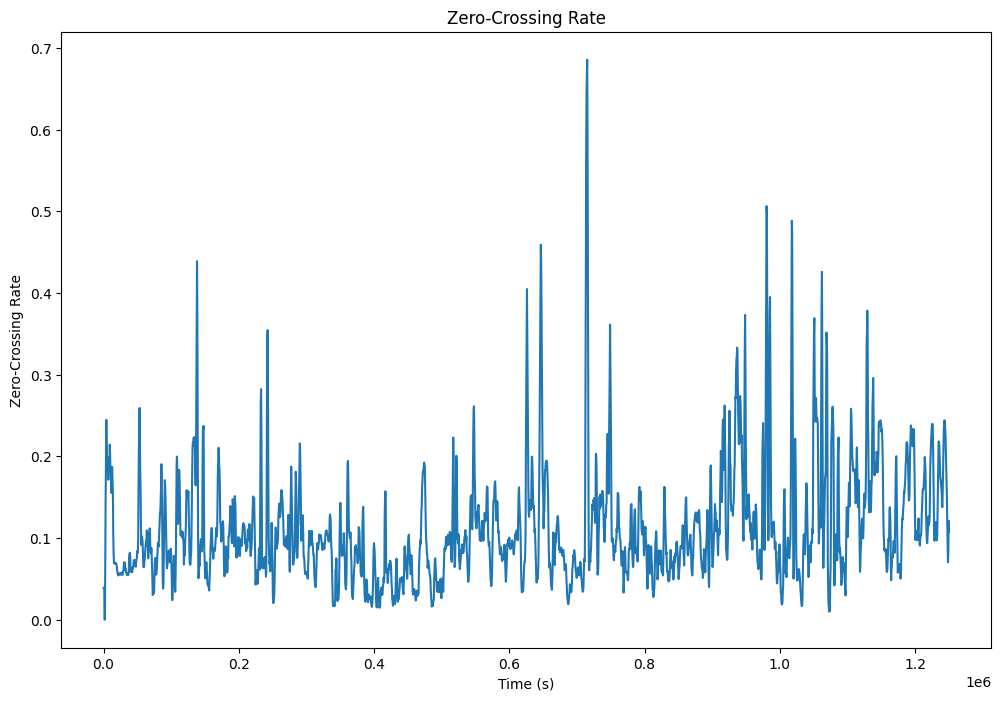

In [ ]:
# Iterate through the outer dictionary
for year, ads in selected_ads.items():
    print(f"Year: {year}")

    # Iterate through the inner dictionaries
    for ad_id, ad_data in ads.items():
        print("============================================================")
        print("============================================================")

        print(f"  AD ID: {ad_id}")

        #ad_path = f"{audio_path}{year}/{ad_id}.wav"
        ad_path = os.path.join(audio_path, year, ad_id + ".wav")
        print(f"  Path: {ad_path}\n")

        # Iterate through the list of data
        for description in ad_data:
            print(f"    Description: {description}\n")

        for indice in indices_to_analyse:
          print(f"    {indice}: {get_indice_of_ad(indice, ad_id + '.wav')}\n")
        #  print(f"{indice}:\n==============\n  {get_indice_of_ad(indice, ad_id)}\n\n")

        # Load the audio file
        y, sr = librosa.load(ad_path)

        # 1. Spectrogram
        # Compute the spectrogram and convert to decibels for visualization
        # A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.
        #D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

        # Display the spectrogram
        plt.figure(figsize=(12, 8))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.show()

        # 2. MFCCs (Mel-Frequency Cepstral Coefficients)
        # Extract Mel-frequency cepstral coefficients
        #mfccs = librosa.feature.mfcc(y, sr=sr)
        #mfccs = librosa.feature.mfcc(y, sr=sr)
        mfccs = mfcc(y, sr)

        # Display MFCCs

        #plt.figure(figsize=(12, 8))
        #librosa.display.specshow(mfccs, x_axis='time')
        #plt.colorbar()
        #plt.title('MFCCs')
        #plt.show()

        # 5. Zero-Crossing Rate
        # Calculate zero-crossing rate
        zero_crossings = librosa.feature.zero_crossing_rate(y)

        # Display Zero-Crossing Rate
        plt.figure(figsize=(12, 8))
        plt.plot(np.arange(0, len(zero_crossings[0])) * len(y) / len(zero_crossings[0]), zero_crossings[0])
        plt.title('Zero-Crossing Rate')
        plt.xlabel('Time (s)')
        plt.ylabel('Zero-Crossing Rate')
        plt.show()



---


## Maxima und Minima der eingeladenen Kennzahlen ermitteln

In [ ]:
def get_max_and_min(df, column_name):
  highest = acoustic_indices.sort_values(by=column_name, ascending=False).iloc[0]
  lowest = acoustic_indices.sort_values(by=column_name, ascending=True).iloc[0]

  column_id = df.columns.get_loc(column_name)

  return highest[0], highest[column_id], lowest[0], lowest[column_id]

In [ ]:
maxima_and_minima = {
    #"indice_name" : {
    #    "max" : ["ad_name", 0],
    #    "min" : ["ad_name", 0],
    #},
}

In [ ]:
for indice in indices_to_analyse:
  max_name, max_value, min_name, min_value = get_max_and_min(acoustic_indices, indice)
  tmp = {
      "max" : [max_name, max_value],
      "min" : [min_name, min_value],
  }
  maxima_and_minima[indice] = tmp
  #print(f"{indice}:\n==============\n  {max_name}: {max_value}\n  {min_name}: {min_value}\n\n")

for indice, values in maxima_and_minima.items():
  print(f"{indice}:\n==============\n  {values['max'][0]}: {values['max'][1]}\n  {values['min'][0]}: {values['min'][1]}\n\n")

Acoustic_Complexity_Index__main_value:
  AD0661.wav: 5676.658006283714
  AD0576.wav: 377.3374225873279


Acoustic_Diversity_Index__main_value:
  AD0378.wav: 2.300058362376058
  AD0467.wav: 1.066756457441678


Acoustic_Evenness_Index__main_value:
  AD0467.wav: 0.7608984221799862
  AD0378.wav: 0.03522905165204922


RMS_energy__mean:
  AD0749.wav: 0.1000645811742377
  AD0363.wav: 0.004798966651372511


Spectral_centroid__mean:
  AD0363.wav: 7213.758008992083
  AD0575.wav: 1196.678066923189


Spectral_Entropy__main_value:
  AD0379.wav: 0.9112755825660742
  AD0467.wav: 0.5982854834119478


Temporal_Entropy__main_value:
  AD0480.wav: 0.9880123836613518
  AD0363.wav: 0.9075372038013815


ZCR__mean:
  AD0379.wav: 0.2078276386312101
  AD0575.wav: 0.0337365608642102






---


## Vergleich der eingeladenen Kennzahlen und der Spektogramme<br>für die Maxima und Minima

In [ ]:
def get_key_by_ad_id(df, ad_id):
    for key, value in df.items():
        if ad_id in value:
            return key
    return None

In [ ]:
# Iterate through the indices and its maxima / minima
for indice, values in maxima_and_minima.items():

    print("============================================================")
    print("============================================================")
    print(f"{indice}\n==========")

    # find values and print plots for max value of current index
    #max_tmp = acoustic_indices[acoustic_indices['filename'] == values['max'][0]]
    print("Max:", values['max'][0][:-4], values['max'][1])

    year = get_key_by_ad_id(selected_ads, values['max'][0][:-4])
    #year_formatted = year[7:-4]

    ad_path = os.path.join(audio_path, year, values['max'][0][:-4] + ".wav")
    # Load the audio file
    y, sr = librosa.load(ad_path)
    # 1. Spectrogram
    # Compute the spectrogram and convert to decibels for visualization
    # A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.
    #D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    # Display the spectrogram
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

    # find values and print plots for min value of current index
    #min_tmp = acoustic_indices[acoustic_indices['filename'] == values['min'][0]]
    print("Min:", values['min'][0][:-4], values['min'][1])

    year = get_key_by_ad_id(selected_ads, values['min'][0][:-4])
    #year_formatted = year[7:-4]

    ad_path = os.path.join(audio_path, year, values['min'][0][:-4] + ".wav")
    # Load the audio file
    y, sr = librosa.load(ad_path)
    # 1. Spectrogram
    # Compute the spectrogram and convert to decibels for visualization
    # A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.
    #D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    # Display the spectrogram
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()



Output hidden; open in https://colab.research.google.com to view.